# Ejercicio 3 (Prueba de algoritmos)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Cargar el dataset completo
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Seleccionar solo las primeras 1000 imágenes y etiquetas
X_train_small = X_train[:10000]
y_train_small = y_train[:10000]

X_test_small = X_test[:2000]   # También podés reducir el test si querés
y_test_small = y_test[:2000]

print("Shape del set de entrenamiento:", X_train_small.shape)
print("Shape del set de prueba:", X_test_small.shape)

Shape del set de entrenamiento: (10000, 28, 28)
Shape del set de prueba: (2000, 28, 28)


### Preprocesamiento

In [2]:
# Aplanar las imágenes de 28x28 a 784 características (1D)
X_train_flattened = X_train_small.reshape(X_train_small.shape[0], -1)
X_test_flattened = X_test_small.reshape(X_test_small.shape[0], -1)

print("Shape del set de entrenamiento:", X_train_flattened.shape)
print("Shape del set de prueba:", X_test_flattened.shape)

# Escalar los valores de los píxeles entre 0 y 1
X_train_normalized = X_train_flattened / 255.0
X_test_normalized = X_test_flattened / 255.0

from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=127)
X_train_binarized = binarizer.fit_transform(X_train_flattened)
X_test_binarized = binarizer.transform(X_test_flattened)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_flattened)
X_test_standardized = scaler.transform(X_test_flattened)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_flattened)
X_test_scaled = scaler.transform(X_test_flattened)

Shape del set de entrenamiento: (10000, 784)
Shape del set de prueba: (2000, 784)


### Preprocesamiento: Datasets a probar

In [3]:
from sklearn.metrics import accuracy_score
import time

# Diccionario de datasets a probar (ya definidos previamente)
datasets = {
    "Raw (sin normalizar)": X_train_flattened,
    "Normalizado (/255)": X_train_normalized,
    "Binarizado": X_train_binarized,
    "Estandarizado (Z-score)": X_train_standardized,
    "Min-Max Scaling": X_train_scaled
}

test_sets = {
    "Raw (sin normalizar)": X_test_flattened,
    "Normalizado (/255)": X_test_normalized,
    "Binarizado": X_test_binarized,
    "Estandarizado (Z-score)": X_test_standardized,
    "Min-Max Scaling": X_test_scaled
}

## RandomForest

In [5]:
from sklearn.ensemble import RandomForestClassifier

total_accuracy = 0
total_time = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n🌲 Evaluando con Random Forest: {nombre}")
    
    # Iniciar contador de tiempo
    start_time = time.time()
    
    # Crear modelo
    model = RandomForestClassifier(n_estimators=150, random_state=42)
    
    # Entrenar
    model.fit(X_train_version, y_train_small)
    
    # Predecir
    X_test_version = test_sets[nombre]
    y_pred = model.predict(X_test_version)
    
    # Calcular precisión
    acc = accuracy_score(y_test_small, y_pred)
    elapsed_time = time.time() - start_time

    total_accuracy += acc
    total_time += elapsed_time

    # Resultados
    print(f"✅ Precisión: {acc * 100:.2f}%")
    print(f"⏱️ Tiempo total: {elapsed_time:.2f} segundos")

# Promedios
avg_accuracy_RandomForest = (total_accuracy / n) * 100
avg_time_RandomForest = total_time / n

print(f"\n📊 Promedio con Random Forest:")
print(f"🔢 Precisión promedio: {avg_accuracy_RandomForest:.2f}%")
print(f"⏳ Tiempo promedio: {avg_time_RandomForest:.2f} segundos")



🌲 Evaluando con Random Forest: Raw (sin normalizar)
✅ Precisión: 93.35%
⏱️ Tiempo total: 8.24 segundos

🌲 Evaluando con Random Forest: Normalizado (/255)
✅ Precisión: 93.35%
⏱️ Tiempo total: 7.98 segundos

🌲 Evaluando con Random Forest: Binarizado
✅ Precisión: 92.30%
⏱️ Tiempo total: 3.73 segundos

🌲 Evaluando con Random Forest: Estandarizado (Z-score)
✅ Precisión: 93.35%
⏱️ Tiempo total: 8.42 segundos

🌲 Evaluando con Random Forest: Min-Max Scaling
✅ Precisión: 93.35%
⏱️ Tiempo total: 7.76 segundos

📊 Promedio con Random Forest:
🔢 Precisión promedio: 93.14%
⏳ Tiempo promedio: 7.23 segundos


## Support Vector Machine (SVC)

In [6]:
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score

# Diccionarios para guardar resultados
avg_accuracy_svm = {}
avg_time_svm = {}

# Lista de kernels a probar
kernels = ['linear', 'rbf', 'poly']

# Evaluar cada kernel de SVM con todos los preprocesamientos
for kernel in kernels:
    print(f"\n==============================")
    print(f"🔍 Evaluando kernel: {kernel}")
    print(f"==============================")
    
    total_accuracy = 0
    total_time = 0
    n = len(datasets)

    for nombre, X_train_version in datasets.items():
        X_test_version = test_sets[nombre]
        
        print(f"\n👉 Preprocesamiento: {nombre}")
        
        # Iniciar cronómetro
        start_time = time.time()
        
        # Crear y entrenar modelo
        model = SVC(kernel=kernel, random_state=42)
        model.fit(X_train_version, y_train_small)
        
        # Predecir
        y_pred = model.predict(X_test_version)
        
        # Evaluar
        acc = accuracy_score(y_test_small, y_pred)
        elapsed_time = time.time() - start_time
        
        total_accuracy += acc
        total_time += elapsed_time
        
        print(f"✅ Precisión: {acc * 100:.2f}%")
        print(f"⏱️ Tiempo total: {elapsed_time:.2f} segundos")
    
    # Guardar resultados promedio para este kernel
    avg_accuracy = (total_accuracy / n) * 100
    avg_time = total_time / n
    avg_accuracy_svm[kernel] = avg_accuracy
    avg_time_svm[kernel] = avg_time

    print(f"\n📊 Promedio para kernel '{kernel}':")
    print(f"🔢 Precisión promedio: {avg_accuracy:.2f}%")
    print(f"⏳ Tiempo promedio: {avg_time:.2f} segundos")


🔍 Evaluando kernel: linear

👉 Preprocesamiento: Raw (sin normalizar)
✅ Precisión: 89.55%
⏱️ Tiempo total: 7.04 segundos

👉 Preprocesamiento: Normalizado (/255)
✅ Precisión: 89.75%
⏱️ Tiempo total: 6.81 segundos

👉 Preprocesamiento: Binarizado
✅ Precisión: 86.65%
⏱️ Tiempo total: 7.75 segundos

👉 Preprocesamiento: Estandarizado (Z-score)
✅ Precisión: 88.70%
⏱️ Tiempo total: 6.81 segundos

👉 Preprocesamiento: Min-Max Scaling
✅ Precisión: 89.90%
⏱️ Tiempo total: 6.85 segundos

📊 Promedio para kernel 'linear':
🔢 Precisión promedio: 88.91%
⏳ Tiempo promedio: 7.05 segundos

🔍 Evaluando kernel: rbf

👉 Preprocesamiento: Raw (sin normalizar)
✅ Precisión: 94.45%
⏱️ Tiempo total: 12.74 segundos

👉 Preprocesamiento: Normalizado (/255)
✅ Precisión: 94.45%
⏱️ Tiempo total: 14.33 segundos

👉 Preprocesamiento: Binarizado
✅ Precisión: 93.85%
⏱️ Tiempo total: 17.40 segundos

👉 Preprocesamiento: Estandarizado (Z-score)
✅ Precisión: 92.10%
⏱️ Tiempo total: 18.95 segundos

👉 Preprocesamiento: Min-Max Scal

## K-nearest neighbors (KNN)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Inicializar variables para los promedios
total_accuracy_knn = 0
total_time_knn = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n👟 Evaluando con KNN: {nombre}")
    
    # Iniciar contador de tiempo
    start_time = time.time()
    
    # Crear modelo KNN
    model_knn = KNeighborsClassifier(n_neighbors=5)  # Número de vecinos (puedes ajustarlo)
    
    # Entrenar
    model_knn.fit(X_train_version, y_train_small)
    
    # Predecir
    X_test_version = test_sets[nombre]
    y_pred_knn = model_knn.predict(X_test_version)
    
    # Calcular precisión
    acc_knn = accuracy_score(y_test_small, y_pred_knn)
    elapsed_time_knn = time.time() - start_time

    total_accuracy_knn += acc_knn
    total_time_knn += elapsed_time_knn

    # Resultados
    print(f"✅ Precisión: {acc_knn * 100:.2f}%")
    print(f"⏱️ Tiempo total: {elapsed_time_knn:.2f} segundos")

# Promedios
avg_accuracy_knn = (total_accuracy_knn / n) * 100
avg_time_knn = total_time_knn / n

print(f"\n📊 Promedio con KNN:")
print(f"🔢 Precisión promedio: {avg_accuracy_knn:.2f}%")
print(f"⏳ Tiempo promedio: {avg_time_knn:.2f} segundos")


👟 Evaluando con KNN: Raw (sin normalizar)
✅ Precisión: 92.05%
⏱️ Tiempo total: 0.51 segundos

👟 Evaluando con KNN: Normalizado (/255)
✅ Precisión: 92.05%
⏱️ Tiempo total: 1.68 segundos

👟 Evaluando con KNN: Binarizado
✅ Precisión: 90.15%
⏱️ Tiempo total: 0.48 segundos

👟 Evaluando con KNN: Estandarizado (Z-score)
✅ Precisión: 88.65%
⏱️ Tiempo total: 0.31 segundos

👟 Evaluando con KNN: Min-Max Scaling
✅ Precisión: 92.05%
⏱️ Tiempo total: 0.29 segundos

📊 Promedio con KNN:
🔢 Precisión promedio: 90.99%
⏳ Tiempo promedio: 0.66 segundos


## Regresion logistica

In [8]:
from sklearn.linear_model import LogisticRegression

# Inicializar variables para los promedios
total_accuracy_logreg = 0
total_time_logreg = 0
n = len(datasets)

# Evaluar cada tipo de preprocesamiento
for nombre, X_train_version in datasets.items():
    print(f"\n📉 Evaluando con Regresión Logística: {nombre}")
    
    # Iniciar contador de tiempo
    start_time = time.time()
    
    # Crear modelo de Regresión Logística
    model_logreg = LogisticRegression(max_iter=1000, random_state=42)
    
    # Entrenar
    model_logreg.fit(X_train_version, y_train_small)
    
    # Predecir
    X_test_version = test_sets[nombre]
    y_pred_logreg = model_logreg.predict(X_test_version)
    
    # Calcular precisión
    acc_logreg = accuracy_score(y_test_small, y_pred_logreg)
    elapsed_time_logreg = time.time() - start_time

    total_accuracy_logreg += acc_logreg
    total_time_logreg += elapsed_time_logreg

    # Resultados
    print(f"✅ Precisión: {acc_logreg * 100:.2f}%")
    print(f"⏱️ Tiempo total: {elapsed_time_logreg:.2f} segundos")

# Promedios
avg_accuracy_logreg = (total_accuracy_logreg / n) * 100
avg_time_logreg = total_time_logreg / n

print(f"\n📊 Promedio con Regresión Logística:")
print(f"🔢 Precisión promedio: {avg_accuracy_logreg:.2f}%")
print(f"⏳ Tiempo promedio: {avg_time_logreg:.2f} segundos")


📉 Evaluando con Regresión Logística: Raw (sin normalizar)
✅ Precisión: 83.15%
⏱️ Tiempo total: 7.71 segundos

📉 Evaluando con Regresión Logística: Normalizado (/255)
✅ Precisión: 87.00%
⏱️ Tiempo total: 2.28 segundos

📉 Evaluando con Regresión Logística: Binarizado
✅ Precisión: 85.60%
⏱️ Tiempo total: 2.18 segundos

📉 Evaluando con Regresión Logística: Estandarizado (Z-score)
✅ Precisión: 86.00%
⏱️ Tiempo total: 2.01 segundos

📉 Evaluando con Regresión Logística: Min-Max Scaling
✅ Precisión: 87.05%
⏱️ Tiempo total: 2.48 segundos

📊 Promedio con Regresión Logística:
🔢 Precisión promedio: 85.76%
⏳ Tiempo promedio: 3.33 segundos


### Cuadro comparativo

📊 Cuadro comparativo de modelos:

          Algoritmo  Precisión (%)  Tiempo (s)
      Random Forest          93.14    7.225313
       SVM (Linear)          88.91    7.051551
          SVM (RBF)          93.82   15.319407
         SVM (Poly)          92.07   15.425675
                KNN          90.99    0.655101
Regresión Logística          85.76    3.329909


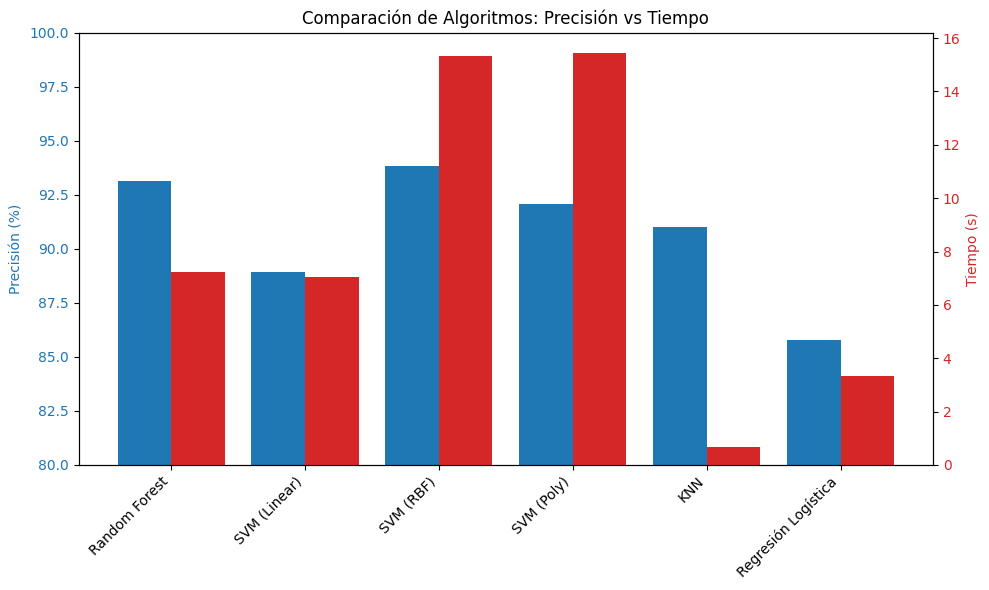

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos promedio (asegurate de tener estos valores definidos previamente)
data = {
    'Algoritmo': [
        'Random Forest',
        'SVM (Linear)',
        'SVM (RBF)',
        'SVM (Poly)',
        'KNN',
        'Regresión Logística'
    ],
    'Precisión (%)': [
        avg_accuracy_RandomForest,
        avg_accuracy_svm['linear'],
        avg_accuracy_svm['rbf'],
        avg_accuracy_svm['poly'],
        avg_accuracy_knn,
        avg_accuracy_logreg
    ],
    'Tiempo (s)': [
        avg_time_RandomForest,
        avg_time_svm['linear'],
        avg_time_svm['rbf'],
        avg_time_svm['poly'],
        avg_time_knn,
        avg_time_logreg
    ]
}

# Crear DataFrame
df = pd.DataFrame(data)

# Mostrar tabla
print("📊 Cuadro comparativo de modelos:\n")
print(df.to_string(index=False))

# ------------------------------
# 📈 Gráfico de comparación
# ------------------------------

# Crear figura y ejes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Índices para barras
x = range(len(df))
width = 0.4

# Barras de precisión
color_acc = 'tab:blue'
bars1 = ax1.bar([i - width/2 for i in x], df['Precisión (%)'], width=width, label='Precisión (%)', color=color_acc)
ax1.set_ylabel('Precisión (%)', color=color_acc)
ax1.tick_params(axis='y', labelcolor=color_acc)

# 🔧 Escala del eje de precisión: de 80 a 100
ax1.set_ylim(80, 100)

# Segundo eje para tiempo
ax2 = ax1.twinx()
color_time = 'tab:red'
bars2 = ax2.bar([i + width/2 for i in x], df['Tiempo (s)'], width=width, label='Tiempo (s)', color=color_time)
ax2.set_ylabel('Tiempo (s)', color=color_time)
ax2.tick_params(axis='y', labelcolor=color_time)

# Etiquetas en eje X
ax1.set_xticks(x)
ax1.set_xticklabels(df['Algoritmo'], rotation=45, ha='right')

# Título
plt.title('Comparación de Algoritmos: Precisión vs Tiempo')
plt.tight_layout()

# Mostrar gráfico
plt.show()
